C:/Users/20115/Desktop/Dataset/train\NORMAL


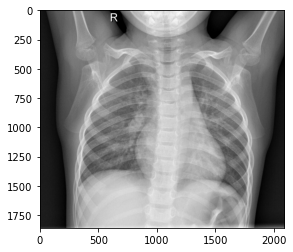

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow.python.framework import ops
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg
#direction of dataset folder 
DATADIR = "C:/Users/20115/Desktop/Dataset/train"
TestData = "C:/Users/20115/Desktop/Dataset/Validation"
#classification using label normal and sick
CATEGORIES = ["NORMAL","Sick"]

#adding all images in 2 folders of the dataset
#in arraylist of images 
for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break
            

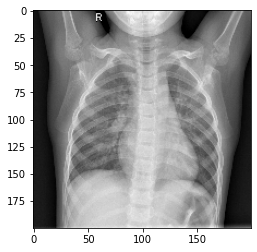

In [13]:
#adding fixed image size to make it easier for training
IMG_SIZE = 200

#resizing all images in the arraylist of images 
new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [14]:
#variable that holds all the training data in the dataset folder
training_data = []

#make function that is responsible for creating the training data 
def create_training_data():
    for category in CATEGORIES:  #do NORMAL and sick

        path = os.path.join(DATADIR,category)  # create NORMAL and sick
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=NORMAL 1=sick

        for img in tqdm(os.listdir(path)):  # iterate over each image per NORMAL and sick
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to  training_data
            except Exception as e:  
                pass

create_training_data()

#view training data
print(len(training_data))
    

100%|██████████| 318/318 [00:05<00:00, 60.22it/s]

636


In [16]:
test_data = []
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TestData,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))


100%|██████████| 7/7 [00:00<00:00, 85.75it/s]

14


In [17]:
print(len(training_data))
print(len(test_data))

636
14


In [18]:
import random
# shuffle the training data
random.shuffle(training_data)
random.shuffle(test_data)

In [19]:
# view some samples
for sample in training_data[1:10]:
    print(sample[1])

0
0
0
1
1
1
1
1
1


In [125]:
# create array X and y where X represents the image feature and 
#y represents the image label ex 0= NORMAL and 1=sick
X = []
y = []

# iterate over each image per training_data
#and append features in X and labels in y
for features,label in training_data:
    X.append(features)
    y.append(label)


#reshape image to meet our fixed size 
#we dont need to reshape a label so y stays same
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)


In [24]:
# create array X and y where X represents the image feature and 
#y represents the image label ex 0= NORMAL and 1=sick
X_test= []
y_test = []

# iterate over each image per training_data
#and append features in X and labels in y
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)


#reshape image to meet our fixed size 
#we dont need to reshape a label so y stays same
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test=np.array(y_test)

X_test=X_test/255.0
X_Test2=X_test.squeeze()

In [10]:
import pickle

#using pickle to reopen this specific features and labels without
#need of repeating the whole process
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [126]:
#represents features of image number 1 in array X
X[1]

array([[[105],
        [112],
        [116],
        ...,
        [ 44],
        [ 37],
        [ 28]],

       [[108],
        [114],
        [105],
        ...,
        [ 43],
        [ 38],
        [ 23]],

       [[114],
        [107],
        [112],
        ...,
        [ 44],
        [ 37],
        [ 24]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=uint8)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

#recalling the trained data where X equals features and y labels
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#divide the image features by 255.0 to be scaled down to 0 -1 .
#as 255.0 will converge very slowly.

X = X/255.0

#adding 3 different dense layer and 3 different layer sizes and 3 different convolutional layers
#to iterate in each of these layers to analyze the result as extract the best dense layer 
#and best layer size and best convolutional layer for assure best training model accuracy

dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer,
                                                         int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            log_dir= os.path.join('logs','fit','{}'.format(NAME))
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1 ,profile_batch = 100000000 )
            
            history=model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard_callback])
            

model.save('Normal_Covid1.model')

1-conv-32-nodes-0-dense-1591960844
Train on 445 samples, validate on 191 samples
Epoch 1/10
445/445 [==============================] - 11s 24ms/sample - loss: 0.5804 - accuracy: 0.7843 - val_loss: 0.1998 - val_accuracy: 0.9267
Epoch 2/10
445/445 [==============================] - 10s 22ms/sample - loss: 0.1525 - accuracy: 0.9348 - val_loss: 0.1260 - val_accuracy: 0.9634
Epoch 3/10
445/445 [==============================] - 10s 22ms/sample - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.1036 - val_accuracy: 0.9372
Epoch 4/10
445/445 [==============================] - 9s 19ms/sample - loss: 0.0402 - accuracy: 0.9888 - val_loss: 0.1070 - val_accuracy: 0.9424
Epoch 5/10
445/445 [==============================] - 8s 17ms/sample - loss: 0.0316 - accuracy: 0.9910 - val_loss: 0.0823 - val_accuracy: 0.9686
Epoch 6/10
445/445 [==============================] - 7s 17ms/sample - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0623 - val_accuracy: 0.9791
Epoch 7/10
445/445 [==========================

Epoch 4/10
445/445 [==============================] - 43s 97ms/sample - loss: 0.0310 - accuracy: 0.9888 - val_loss: 0.3142 - val_accuracy: 0.9058
Epoch 5/10
445/445 [==============================] - 46s 104ms/sample - loss: 0.1194 - accuracy: 0.9640 - val_loss: 0.0814 - val_accuracy: 0.9791
Epoch 6/10
445/445 [==============================] - 51s 115ms/sample - loss: 0.0394 - accuracy: 0.9843 - val_loss: 0.0598 - val_accuracy: 0.9738
Epoch 7/10
445/445 [==============================] - 46s 104ms/sample - loss: 0.0146 - accuracy: 0.9933 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 8/10
445/445 [==============================] - 49s 111ms/sample - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9791
Epoch 9/10
445/445 [==============================] - 50s 113ms/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9843
Epoch 10/10
445/445 [==============================] - 47s 105ms/sample - loss: 0.0028 - accuracy: 0.9978 - val_loss: 0

Epoch 7/10
445/445 [==============================] - 28s 64ms/sample - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 8/10
445/445 [==============================] - 29s 64ms/sample - loss: 0.0223 - accuracy: 0.9910 - val_loss: 0.0677 - val_accuracy: 0.9791
Epoch 9/10
445/445 [==============================] - 27s 61ms/sample - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.0500 - val_accuracy: 0.9843
Epoch 10/10
445/445 [==============================] - 28s 62ms/sample - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.0473 - val_accuracy: 0.9843
3-conv-32-nodes-1-dense-1591966010
Train on 445 samples, validate on 191 samples
Epoch 1/10
445/445 [==============================] - 36s 81ms/sample - loss: 0.6317 - accuracy: 0.6764 - val_loss: 0.4245 - val_accuracy: 0.9215
Epoch 2/10
445/445 [==============================] - 28s 63ms/sample - loss: 0.2326 - accuracy: 0.9371 - val_loss: 0.1602 - val_accuracy: 0.9267
Epoch 3/10
445/445 [======================

Epoch 3/10
445/445 [==============================] - 30s 68ms/sample - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.1096 - val_accuracy: 0.9424
Epoch 4/10
445/445 [==============================] - 31s 69ms/sample - loss: 0.0390 - accuracy: 0.9865 - val_loss: 0.0741 - val_accuracy: 0.9791
Epoch 5/10
445/445 [==============================] - 31s 69ms/sample - loss: 0.0451 - accuracy: 0.9820 - val_loss: 0.0554 - val_accuracy: 0.9895
Epoch 6/10
445/445 [==============================] - 32s 72ms/sample - loss: 0.0167 - accuracy: 0.9933 - val_loss: 0.0655 - val_accuracy: 0.9791
Epoch 7/10
445/445 [==============================] - 31s 70ms/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9686
Epoch 8/10
445/445 [==============================] - 32s 72ms/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 0.9791
Epoch 9/10
445/445 [==============================] - 31s 70ms/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0501 -

Epoch 6/10
445/445 [==============================] - 70s 158ms/sample - loss: 0.0248 - accuracy: 0.9888 - val_loss: 0.1099 - val_accuracy: 0.9529
Epoch 7/10
445/445 [==============================] - 75s 168ms/sample - loss: 0.0444 - accuracy: 0.9888 - val_loss: 0.0985 - val_accuracy: 0.9686
Epoch 8/10
445/445 [==============================] - 71s 160ms/sample - loss: 0.0961 - accuracy: 0.9640 - val_loss: 0.3268 - val_accuracy: 0.9058
Epoch 9/10
445/445 [==============================] - 73s 164ms/sample - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0668 - val_accuracy: 0.9843
Epoch 10/10
445/445 [==============================] - 62s 138ms/sample - loss: 0.0647 - accuracy: 0.9775 - val_loss: 0.1208 - val_accuracy: 0.9634
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Normal_Covid1.model\assets


In [3]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
%tensorboard --logdir logs --host localhost

Reusing TensorBoard on port 6006 (pid 12188), started 3 days, 8:27:39 ago. (Use '!kill 12188' to kill it.)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

optimizer='Adam'
loss='binary_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history2=model.fit(X, y,
          batch_size=32,
          epochs=15,
          validation_split=0.3)

print(model.summary())
model.save('Normal_Covid2.model')

Train on 445 samples, validate on 191 samples
Epoch 1/15
445/445 [==============================] - 27s 60ms/sample - loss: 0.7025 - accuracy: 0.5034 - val_loss: 0.6930 - val_accuracy: 0.5079
Epoch 2/15
445/445 [==============================] - 32s 71ms/sample - loss: 0.6935 - accuracy: 0.4831 - val_loss: 0.6925 - val_accuracy: 0.5079
Epoch 3/15
445/445 [==============================] - 50s 113ms/sample - loss: 0.6718 - accuracy: 0.5933 - val_loss: 0.4829 - val_accuracy: 0.8796
Epoch 4/15
445/445 [==============================] - 39s 88ms/sample - loss: 0.3173 - accuracy: 0.8809 - val_loss: 0.3057 - val_accuracy: 0.8586
Epoch 5/15
445/445 [==============================] - 40s 91ms/sample - loss: 0.2019 - accuracy: 0.9326 - val_loss: 0.2489 - val_accuracy: 0.9215
Epoch 6/15
445/445 [==============================] - 34s 78ms/sample - loss: 0.1431 - accuracy: 0.9618 - val_loss: 0.1431 - val_accuracy: 0.9372
Epoch 7/15
445/445 [==============================] - 34s 77ms/sample - loss:

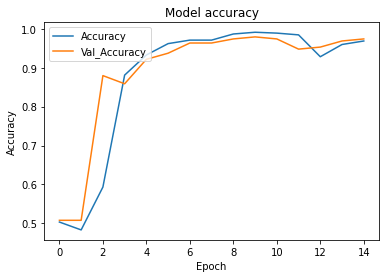

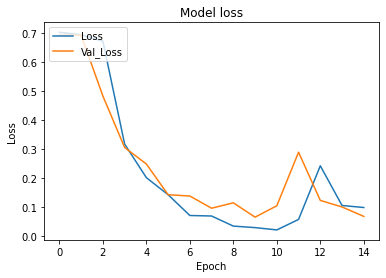

In [25]:
# plotting the accuracy and validation accuracy graph
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

# plotting the loss and validation loss graph
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()


14
0


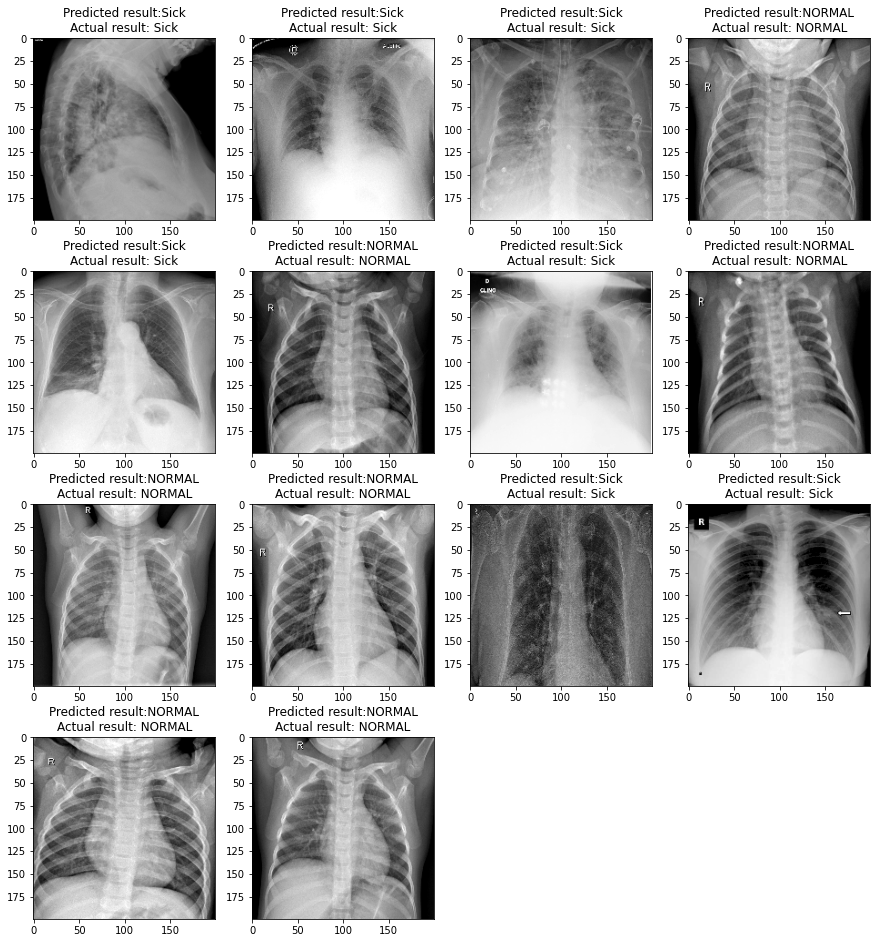

In [67]:

model = tf.keras.models.load_model('Normal_Covid2.model')
i=0
prop_class=[]
mis_class=[]
classes = model.predict(X_test)
labels = (classes > 0.7).astype(np.int)                        


labels=[int("".join([str(y) for y in x])) for x in labels]

for i in range(len(y_test)):
    if(labels[i])==y_test[i]:
        prop_class.append(i)
print(len(prop_class))        
i=0
for i in range(len(y_test)):
    if(labels[i])!=y_test[i]:
        mis_class.append(i)
        
print(len(mis_class))
# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6

    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[labels[prop_class[i]]]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[prop_class[i]]] )
    ax.Color = 'red';
    ax.imshow(X_Test2[prop_class[i]], cmap="gray")

Confusion matrix, without normalization
[[7 0]
 [0 7]]
Classification Report
1.0
              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00         7
      normal       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



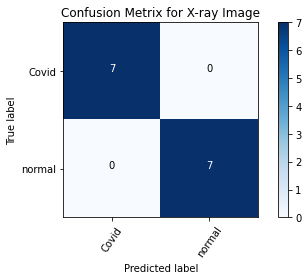

In [71]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=55)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(labels, y_test)
cm_plot_label =['Covid', 'normal']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(labels, y_test)
print(accuracy_score(labels, y_test))
target_names = ['Covid', 'normal']
 
report = classification_report(y_test, labels, target_names=target_names)
print(report) 


In [158]:

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
CATEGORIES = ["Covid", "Normal","Phenomina"]


macro_roc_auc_ovo = roc_auc_score(y_test, labels, multi_class="ovo",
                                  average="macro")
plt.show()
weighted_roc_auc_ovo = roc_auc_score(y_test, labels, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, labels, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, labels, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


Train on 14 samples
Epoch 1/5
14/14 [==============================] - 2s 162ms/sample - loss: 0.0443 - accuracy: 1.0000
Epoch 2/5
14/14 [==============================] - 1s 93ms/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 3/5
14/14 [==============================] - 1s 93ms/sample - loss: 0.0358 - accuracy: 1.0000
Epoch 4/5
14/14 [==============================] - 1s 94ms/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 1s 94ms/sample - loss: 9.4312e-04 - accuracy: 1.0000
AUC: 1.000


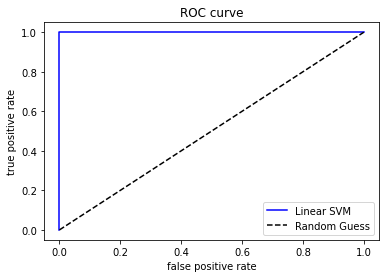

In [159]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model = tf.keras.models.load_model('Normal_Covid2.model')
model.fit(X_test, y_test, epochs=5, batch_size=100, verbose=1)

decision_scores = model.predict(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [160]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, decision_scores)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


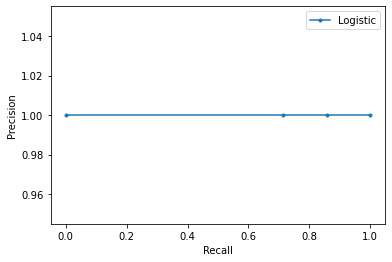

In [161]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, _ = precision_recall_curve(y_test, decision_scores)
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()